<a href="https://colab.research.google.com/github/s-choung/CER_repository_CCEL/blob/main/Climbvolcano_schoung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b

In [60]:
df = pd.read_excel('test3.xlsx')
p5n4 = df.loc[ (df['#of N'] == 4) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl','G_Cl_brid', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','OVER_Cl_brid']]
p5n3 = df.loc[ (df['#of N'] == 3) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl','G_Cl_brid', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','OVER_Cl_brid']]
p5n2 = df.loc[ (df['#of N'] == 2) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl','G_Cl_brid', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','OVER_Cl_brid']]
p5n1 = df.loc[ (df['#of N'] == 1) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl','G_Cl_brid', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','OVER_Cl_brid']]
p5n0 = df.loc[ (df['#of N'] == 0) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl','G_Cl_brid', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','OVER_Cl_brid']]
p5n2t = df.loc[ (df['#of N'] == '2-t') & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl','G_Cl_brid', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','OVER_Cl_brid']]

p5n3

,s,#of N,M,G_Cl,G_Cl_brid,G_O,G_OH,G_OOH,OVER_Cl,Over_OER,OVER_Cl_brid
12,p5,3,Mn,0.72,1.09,0.52,0.75,3.41,0.64,1.66,0.27
13,p5,3,Fe,0.77,1.15,0.60,0.79,3.40,0.59,1.57,0.21
14,p5,3,Co,0.85,0.85,0.83,0.94,3.59,0.51,1.53,0.51
15,p5,3,Ni,1.61,1.48,1.17,1.22,4.19,0.25,1.79,0.12
16,p5,3,Cu,0.90,0.90,0.62,0.37,3.45,0.46,1.60,0.46
17,p5,3,Rh,0.59,0.59,0.91,0.88,3.72,0.77,1.58,0.77
18,p5,3,Pd,1.91,1.70,1.58,1.45,4.35,0.55,1.54,0.34
19,p5,3,Ag,1.06,1.06,1.31,0.55,3.57,0.30,1.03,0.30
20,p5,3,Ir,0.70,0.70,1.21,0.94,3.85,0.66,1.41,0.66
21,p5,3,Pt,1.92,1.96,1.96,1.71,4.58,0.56,1.39,0.56


In [61]:
#p5n3=p5n3.drop(185)
#p5n3=p5n3.drop(184)
#p5n3=p5n3.drop(189)

p5 = [p5n4,p5n3,p5n2,p5n2t,p5n1,p5n0]
for i in p5 :
    a = list(i['G_OH']-1.23)
    b =list(i['G_O']-i['G_OH']-1.23)
    c = list(i['G_OOH']-i['G_O']-1.23)
    d = list(4.92-i['G_OOH']-1.23)

    i['Over_OER'] = np.max([a,b,c,d],axis=0)
p5n2t

,s,#of N,M,G_Cl,G_Cl_brid,G_O,G_OH,G_OOH,OVER_Cl,Over_OER,OVER_Cl_brid
60,p5,2-t,Mn,0.48,0.84,0.22,0.57,3.23,0.88,1.78,0.52
61,p5,2-t,Fe,0.57,0.86,0.29,0.60,1.71,0.79,1.98,0.50
62,p5,2-t,Co,0.78,0.80,0.38,0.53,3.33,0.58,1.72,0.56
63,p5,2-t,Ni,1.27,1.08,0.71,0.90,3.83,0.09,1.89,0.09
64,p5,2-t,Cu,1.52,1.01,0.80,0.64,3.79,0.16,1.76,0.16
65,p5,2-t,Rh,0.56,0.56,0.31,0.69,1.71,0.80,1.98,0.80
66,p5,2-t,Pd,1.55,1.28,0.91,1.09,3.95,0.19,1.81,0.08
67,p5,2-t,Ag,1.80,1.19,1.34,0.85,3.92,0.44,1.35,0.17
68,p5,2-t,Ir,0.50,0.50,0.74,0.74,3.64,0.86,1.67,0.86
69,p5,2-t,Pt,1.49,1.47,1.30,1.24,4.18,0.13,1.65,0.11


# Solvation 고려

In [62]:
p5 = [p5n4,p5n3,p5n2,p5n2t,p5n1,p5n0]

for i in p5 :
    i['G_OOH'] = i['G_OOH'] - 0.3
    i['G_OH'] = i['G_OH'] - 0.3
    
    a = list(i['G_OH']-1.23)
    b =list(i['G_O']-i['G_OH']-1.23)
    c = list(i['G_OOH']-i['G_O']-1.23)
    d = list(4.92-i['G_OOH']-1.23)

    i['Over_OER'] = np.max([a,b,c,d],axis=0)



6개 아톰을 엑셀에서 아예 지워버려서 아래코드는 필요없을듯!

In [63]:
drop_M = ['Tc','Re','Os','Mo',"W",'Ru']
p5_drop = []
for i in p5 :
    for j in drop_M :
        i = i[i['M'] != j]
    p5_drop.append(i)
        
p5_drop[0]

,s,#of N,M,G_Cl,G_Cl_brid,G_O,G_OH,G_OOH,OVER_Cl,Over_OER,OVER_Cl_brid
0,p5,4,Mn,0.80,0.80,1.64,0.59,3.56,0.56,0.69,0.80
1,p5,4,Fe,0.86,0.86,1.77,0.67,3.48,0.50,0.48,0.86
2,p5,4,Co,1.15,1.15,2.77,1.06,3.79,0.21,0.48,1.15
3,p5,4,Ni,1.83,1.83,4.05,1.93,4.51,0.47,0.89,1.83
4,p5,4,Cu,1.90,1.90,4.50,2.03,4.56,0.54,1.24,1.90
5,p5,4,Rh,1.03,1.03,2.78,1.01,3.80,0.33,0.54,1.03
6,p5,4,Pd,2.07,2.07,4.80,2.24,4.65,0.71,1.33,2.07
7,p5,4,Ag,2.06,2.06,4.97,2.41,4.62,0.70,1.33,2.06
8,p5,4,Ir,1.08,1.08,2.41,1.04,3.88,0.28,0.24,1.08
9,p5,4,Pt,2.03,2.03,4.36,2.21,4.68,0.67,0.98,2.03


In [84]:
def climbvolcano(TM) :
    plt.figure(1,figsize=(15,10))
    ax = plt.subplot(111)

    x = []
    y = []

    x_fit = np.arange(0.5,2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,c='black',linewidth=2) 
    
    c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe']
    l = [TM+'N$_4$C',TM+'N$_3$C',TM+'N$_2$C',TM+'N$_2$C-t',TM+'N$_1$C',TM+'N$_0$C']
    j = 0
    
    arrowx = list()
    arrowy = list()
    
    arrowx_left = list()
    arrowx_right = list()
    

    
    ###여기 brid인지 top인지 감지하는 if문 넣음!
    for i in p5 :
        top = float(i.loc[i['M']== TM, 'G_Cl'])
        brid = float(i.loc[i['M']== TM,'G_Cl_brid'])

        if top < brid :
          Gcl = top
          Gcl2 = brid
          mark = "o"
          mark2 = "v"
          η1 = Gcl - 1.36
          η2 = 1.36 - Gcl
          η = np.maximum(η1,η2)
          η3 = Gcl2 - 1.36
          η4 = 1.36 - Gcl2
          η_loser = np.maximum(η3,η4)   
          ax.scatter(Gcl,-η,c = c[j],label = l[j],s=300,alpha=0.5, marker=mark)
          ax.scatter(Gcl2,-η_loser,c = c[j],label = l[j],s=300,alpha=0.5, marker=mark2)
        else: 
          Gcl = brid
          Gcl2 = top
          mark = "v"
          mark2 = "o"
          η1 = Gcl - 1.36
          η2 = 1.36 - Gcl
          η = np.maximum(η1,η2)
          η3 = Gcl2 - 1.36
          η4 = 1.36 - Gcl2
          η_loser = np.maximum(η3,η4)        
          ax.scatter(Gcl,-η,c = c[j],label = l[j],s=300,alpha=0.5, marker=mark)
          ax.scatter(Gcl2,-η_loser,c = c[j],label = l[j],s=300,alpha=0.5, marker=mark2)

        j = j+1
        
        arrowx.append(Gcl)
        arrowy.append(-η)
    for i in range(len(arrowx)) :
        if arrowx[i] < 1.36 :
            arrowx_left.append(arrowx[i])

        if arrowx[i] >= 1.36 :
            arrowx_right.append(arrowx[i])


    if len(arrowx_left) != 0 :        
        arrowx_left = np.array(sorted(arrowx_left))
        arrowy_left = 1.36-arrowx_left
    
    if len(arrowx_right) != 0 :
        arrowx_right = np.array(sorted(arrowx_right)[::-1])
        #print(arrowx_right)
        arrowy_right = arrowx_right-1.36
                                
                                
    arrowy_min = max(arrowy)
                                
    if len(arrowx_left) != 0 and len(arrowx_right) != 0 :
        arrowx_min = arrowx[arrowy.index(arrowy_min)]
    
        arrowx_left = np.append(arrowx_left,arrowx_min)
        arrowy_left = np.append(arrowy_left,arrowy_min)
    
        arrowx_right = np.append(arrowx_right,arrowx_min)
        arrowy_right = np.append(arrowy_right,arrowy_min)
    
    if len(arrowx_left) != 0 :     
        temp1 = arrowx_left[0]
        temp2 = -arrowy_left[0]
        for i in range(0,len(arrowx_left)) :
            if temp1 != arrowx_left[i] :
            #print(arrowx_left[i], -arrowy_left[i])
                ann = ax.annotate("",
                                  xy=(arrowx_left[i], -arrowy_left[i]), xycoords='data',
                                  xytext=(temp1, temp2), textcoords='data',
                                  size=40, va="center", ha="center",
                                  arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                                 )
            temp1, temp2 = arrowx_left[i], -arrowy_left[i]
            
    if len(arrowx_right) != 0 :     
        temp1 = arrowx_right[0]
        temp2 = -arrowy_right[0]
        for i in range(0,len(arrowx_right)) :
            #print(arrowx_right[i], -arrowy_right[i])
            if temp1 != arrowx_right[i] :
                ann = ax.annotate("",
                                  xy=(arrowx_right[i], -arrowy_right[i]), xycoords='data',
                                  xytext=(temp1, temp2), textcoords='data',
                                  size=40, va="center", ha="center",
                                  arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=+1",fc="w")
                                 )
            temp1, temp2 = arrowx_right[i], -arrowy_right[i]
        
        
    ax.legend(fontsize=15)
        
    plt.xlabel('ΔG$_{Cl}$',fontsize=30)
    plt.ylabel('-η$_{CER}$',fontsize=30)
    plt.savefig(str(TM)+'3.png')#다운로드할때 쓰기

    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.show()

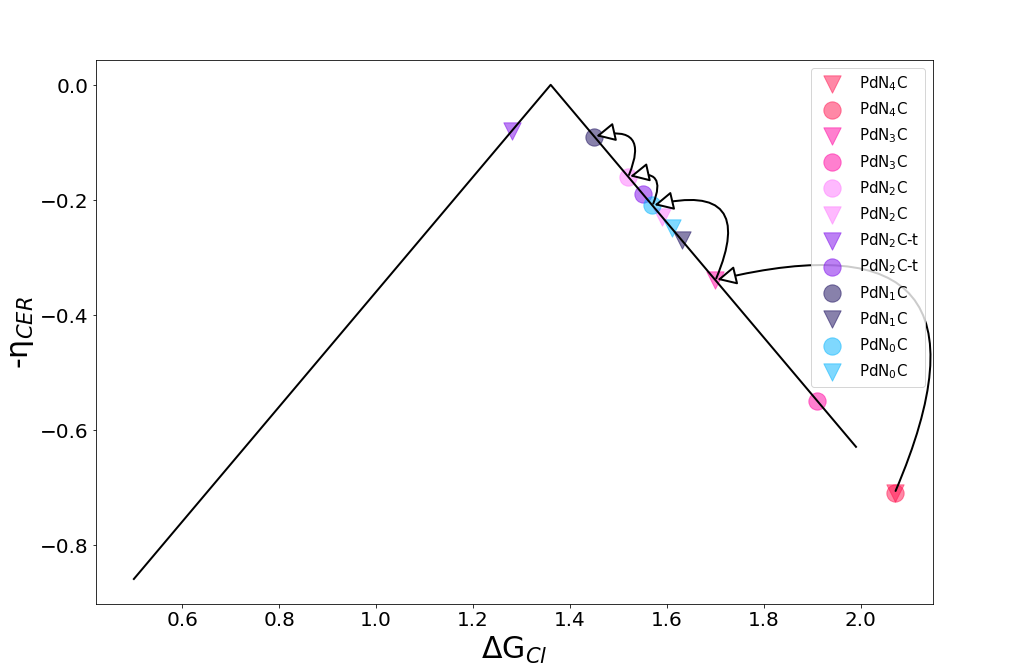

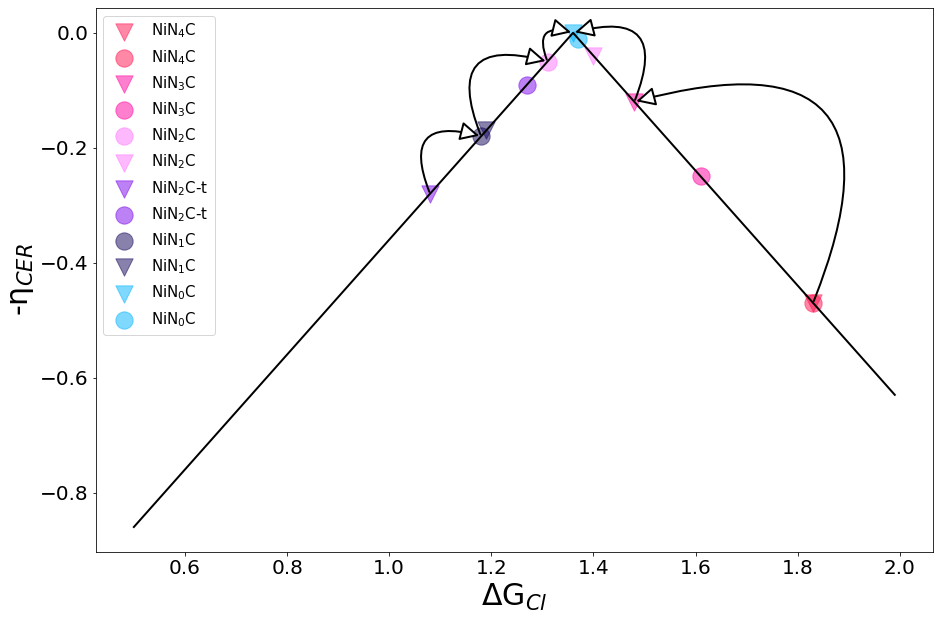

In [65]:
climbvolcano('Pd')
climbvolcano('Ni')

In [66]:
def climbvolcano_annonimous(TM) :  # brid인지 top인지 모르게
    plt.figure(1,figsize=(15,10))
    ax = plt.subplot(111)

    x = []
    y = []

    x_fit = np.arange(0.5,2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,c='black',linewidth=2) 
    
    c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe']
    l = [TM+'N$_4$C',TM+'N$_3$C',TM+'N$_2$C',TM+'N$_2$C-t',TM+'N$_1$C',TM+'N$_0$C']
    j = 0
    
    arrowx = list()
    arrowy = list()
    
    arrowx_left = list()
    arrowx_right = list()
    

    
    ###여기 brid인지 top인지 감지하는 if문 넣음!
    for i in p5 :
        top = float(i.loc[i['M']== TM, 'G_Cl'])
        brid = float(i.loc[i['M']== TM,'G_Cl_brid'])
        mark = "o"
        if top < brid :
          Gcl = top
        else: 
          Gcl = brid
        η1 = Gcl - 1.36
        η2 = 1.36 - Gcl
        η = np.maximum(η1,η2)
        ax.scatter(Gcl,-η,c = c[j],label = l[j],s=300,alpha=0.5, marker=mark)
        j = j+1
        
        arrowx.append(Gcl)
        arrowy.append(-η)
    for i in range(len(arrowx)) :
        if arrowx[i] < 1.36 :
            arrowx_left.append(arrowx[i])

        if arrowx[i] >= 1.36 :
            arrowx_right.append(arrowx[i])


    if len(arrowx_left) != 0 :        
        arrowx_left = np.array(sorted(arrowx_left))
        arrowy_left = 1.36-arrowx_left
    
    if len(arrowx_right) != 0 :
        arrowx_right = np.array(sorted(arrowx_right)[::-1])
        #print(arrowx_right)
        arrowy_right = arrowx_right-1.36
                                
                                
    arrowy_min = max(arrowy)
                                
    if len(arrowx_left) != 0 and len(arrowx_right) != 0 :
        arrowx_min = arrowx[arrowy.index(arrowy_min)]
    
        arrowx_left = np.append(arrowx_left,arrowx_min)
        arrowy_left = np.append(arrowy_left,arrowy_min)
    
        arrowx_right = np.append(arrowx_right,arrowx_min)
        arrowy_right = np.append(arrowy_right,arrowy_min)
    
    if len(arrowx_left) != 0 :     
        temp1 = arrowx_left[0]
        temp2 = -arrowy_left[0]
        for i in range(0,len(arrowx_left)) :
            if temp1 != arrowx_left[i] :
            #print(arrowx_left[i], -arrowy_left[i])
                ann = ax.annotate("",
                                  xy=(arrowx_left[i], -arrowy_left[i]), xycoords='data',
                                  xytext=(temp1, temp2), textcoords='data',
                                  size=40, va="center", ha="center",
                                  arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                                 )
            temp1, temp2 = arrowx_left[i], -arrowy_left[i]
            
    if len(arrowx_right) != 0 :     
        temp1 = arrowx_right[0]
        temp2 = -arrowy_right[0]
        for i in range(0,len(arrowx_right)) :
            #print(arrowx_right[i], -arrowy_right[i])
            if temp1 != arrowx_right[i] :
                ann = ax.annotate("",
                                  xy=(arrowx_right[i], -arrowy_right[i]), xycoords='data',
                                  xytext=(temp1, temp2), textcoords='data',
                                  size=40, va="center", ha="center",
                                  arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=+1",fc="w")
                                 )
            temp1, temp2 = arrowx_right[i], -arrowy_right[i]
        
        
    ax.legend(fontsize=15)
        
    plt.xlabel('ΔG$_{Cl}$',fontsize=30)
    plt.ylabel('-η$_{CER}$',fontsize=30)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.savefig(str(TM)+'2.png')#다운로드할때 쓰기

    plt.show()

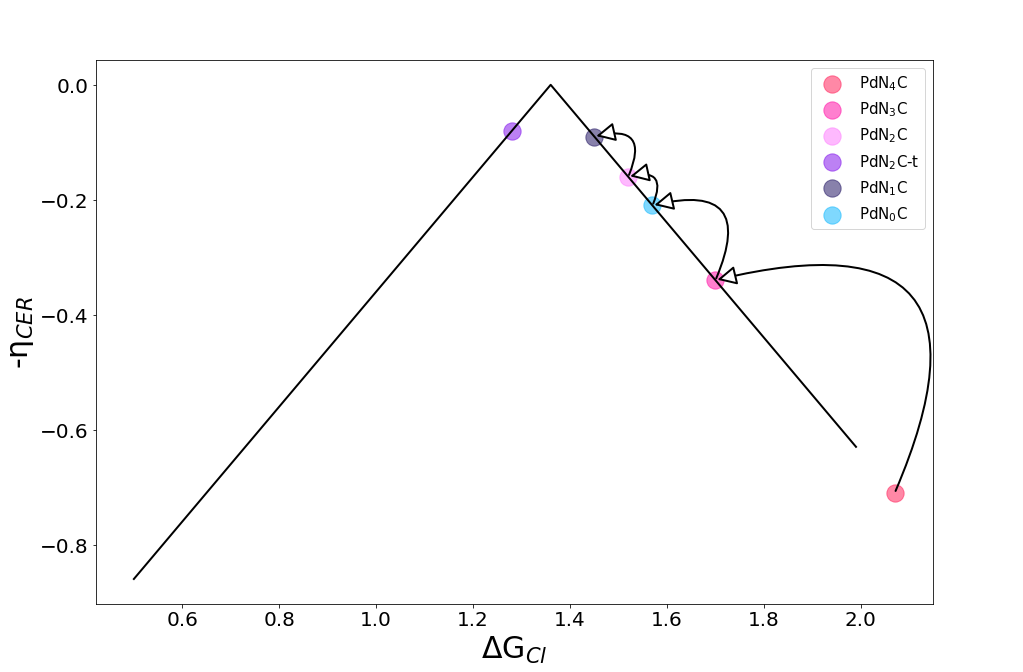

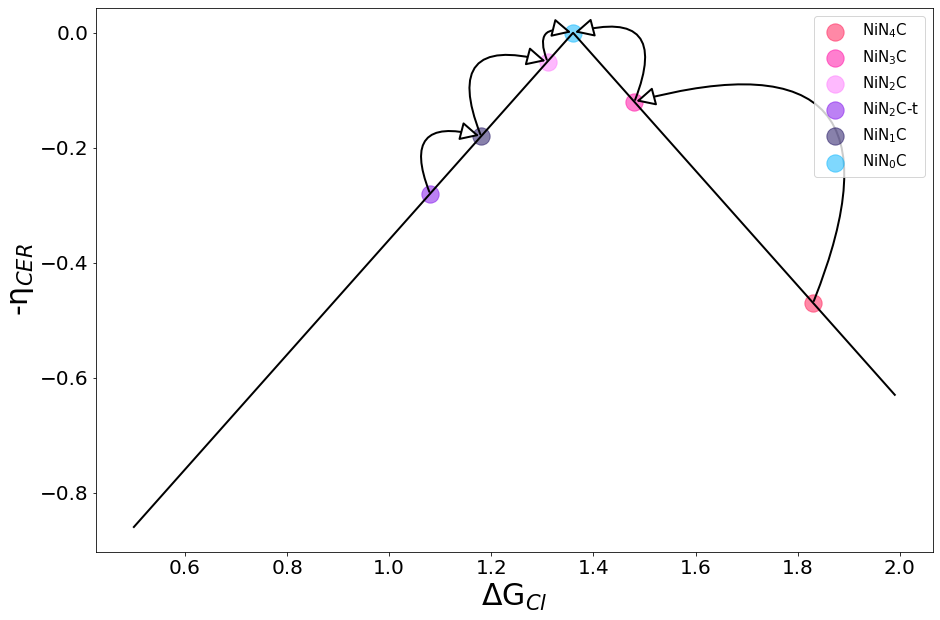

In [67]:
climbvolcano_annonimous('Pd')
climbvolcano_annonimous('Ni')

In [68]:
'''def climbvolcano_annonimous2(TM) :  # 2N의 경우 하나만 표시하게
    plt.figure(1,figsize=(15,10))
    ax = plt.subplot(111)

    x = []
    y = []

    x_fit = np.arange(0.5,2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,c='black',linewidth=2) 
    
    c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe']
    l = [TM+'N$_4$C',TM+'N$_3$C',TM+'N$_2$C',TM+'N$_2$C-t',TM+'N$_1$C',TM+'N$_0$C']
    j = 0
    
    arrowx = list()
    arrowy = list()
    
    arrowx_left = list()
    arrowx_right = list()
    

    Gcllist = list()
    j = 0   
    ###여기 trans vs cis 판별
    for i in p5 :
        top = float(i.loc[i['M']== TM, 'G_Cl'])
        brid = float(i.loc[i['M']== TM,'G_Cl_brid'])
        mark = "o"
        temp = (i.loc[i['M']== TM, '#of N']).values[0]
        if temp == '2-t':
            type = 'trans'
            temp = '2'
            mark = 'o'
         Gcl= (i.loc[i['M']== TM, 'G_Cl']).values[0]       
        Gcllist.append(Gcl)          
        j = j+1
        if Gcllist[2] > Gcllist[3] :
              del Gcllist[2]
        else :
              del Gcllist[3]
        if top < brid :
          Gcllist = top
        else: 
          Gcllist = brid
        η1 = Gcllist - 1.36
        η2 = 1.36 - Gcllist
        η = np.maximum(η1,η2)
        ax.scatter(Gcllist,-η,c = c[j],label = l[j],s=300,alpha=0.5, marker=mark)
        j = j+1
        
        arrowx.append(Gcl)
        arrowy.append(-η)
    for i in range(len(arrowx)) :
        if arrowx[i] < 1.36 :
            arrowx_left.append(arrowx[i])

        if arrowx[i] >= 1.36 :
            arrowx_right.append(arrowx[i])


    if len(arrowx_left) != 0 :        
        arrowx_left = np.array(sorted(arrowx_left))
        arrowy_left = 1.36-arrowx_left
    
    if len(arrowx_right) != 0 :
        arrowx_right = np.array(sorted(arrowx_right)[::-1])
        #print(arrowx_right)
        arrowy_right = arrowx_right-1.36
                                
                                
    arrowy_min = max(arrowy)
                                
    if len(arrowx_left) != 0 and len(arrowx_right) != 0 :
        arrowx_min = arrowx[arrowy.index(arrowy_min)]
    
        arrowx_left = np.append(arrowx_left,arrowx_min)
        arrowy_left = np.append(arrowy_left,arrowy_min)
    
        arrowx_right = np.append(arrowx_right,arrowx_min)
        arrowy_right = np.append(arrowy_right,arrowy_min)
    
    if len(arrowx_left) != 0 :     
        temp1 = arrowx_left[0]
        temp2 = -arrowy_left[0]
        for i in range(0,len(arrowx_left)) :
            if temp1 != arrowx_left[i] :
            #print(arrowx_left[i], -arrowy_left[i])
                ann = ax.annotate("",
                                  xy=(arrowx_left[i], -arrowy_left[i]), xycoords='data',
                                  xytext=(temp1, temp2), textcoords='data',
                                  size=40, va="center", ha="center",
                                  arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                                 )
            temp1, temp2 = arrowx_left[i], -arrowy_left[i]
            
    if len(arrowx_right) != 0 :     
        temp1 = arrowx_right[0]
        temp2 = -arrowy_right[0]
        for i in range(0,len(arrowx_right)) :
            #print(arrowx_right[i], -arrowy_right[i])
            if temp1 != arrowx_right[i] :
                ann = ax.annotate("",
                                  xy=(arrowx_right[i], -arrowy_right[i]), xycoords='data',
                                  xytext=(temp1, temp2), textcoords='data',
                                  size=40, va="center", ha="center",
                                  arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=+1",fc="w")
                                 )
            temp1, temp2 = arrowx_right[i], -arrowy_right[i]
        
        
    ax.legend(fontsize=15)
        
    plt.xlabel('ΔG$_{Cl}$',fontsize=30)
    plt.ylabel('-η$_{CER}$',fontsize=30)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.show()
'''

'def climbvolcano_annonimous2(TM) :  # 2N의 경우 하나만 표시하게\n    plt.figure(1,figsize=(15,10))\n    ax = plt.subplot(111)\n\n    x = []\n    y = []\n\n    x_fit = np.arange(0.5,2,0.01)\n    y_fit1 = x_fit-1.36\n    y_fit2 = 1.36-x_fit\n    y_fit = np.maximum(y_fit1,y_fit2)\n    ax.plot(x_fit,-y_fit,c=\'black\',linewidth=2) \n    \n    c = [\'#ff124f\',\'#ff00a0\',\'#fe75fe\',\'#7a04eb\',\'#120458\',\'#00b3fe\']\n    l = [TM+\'N$_4$C\',TM+\'N$_3$C\',TM+\'N$_2$C\',TM+\'N$_2$C-t\',TM+\'N$_1$C\',TM+\'N$_0$C\']\n    j = 0\n    \n    arrowx = list()\n    arrowy = list()\n    \n    arrowx_left = list()\n    arrowx_right = list()\n    \n\n    Gcllist = list()\n    j = 0   \n    ###여기 trans vs cis 판별\n    for i in p5 :\n        top = float(i.loc[i[\'M\']== TM, \'G_Cl\'])\n        brid = float(i.loc[i[\'M\']== TM,\'G_Cl_brid\'])\n        mark = "o"\n        temp = (i.loc[i[\'M\']== TM, \'#of N\']).values[0]\n        if temp == \'2-t\':\n            type = \'trans\'\n            temp = \'2\'\n        

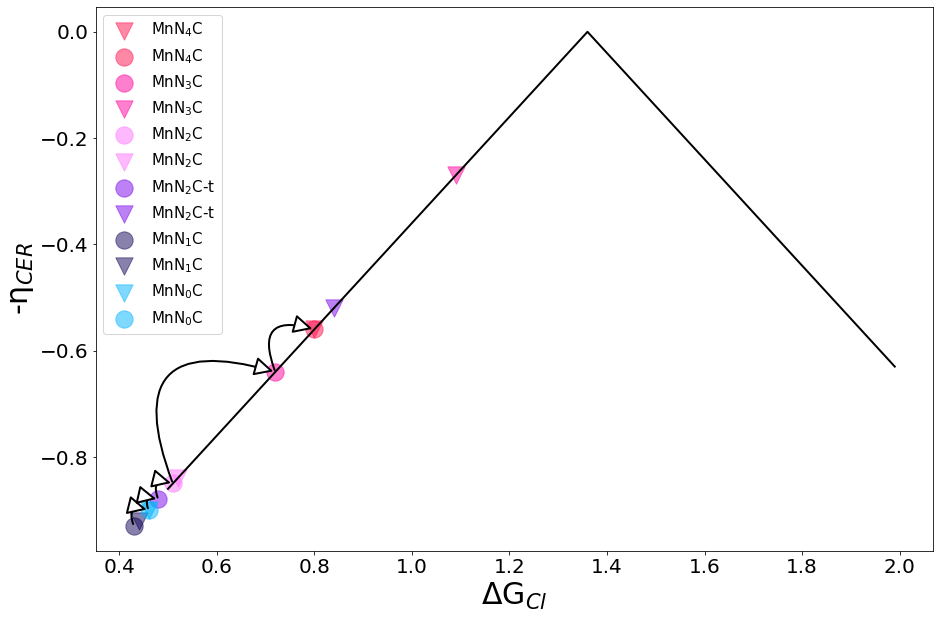

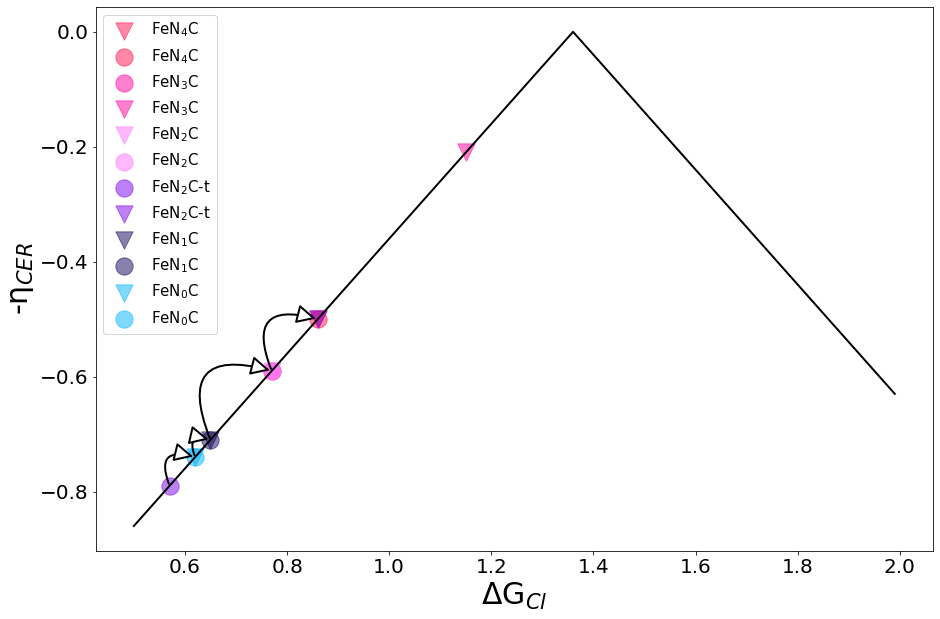

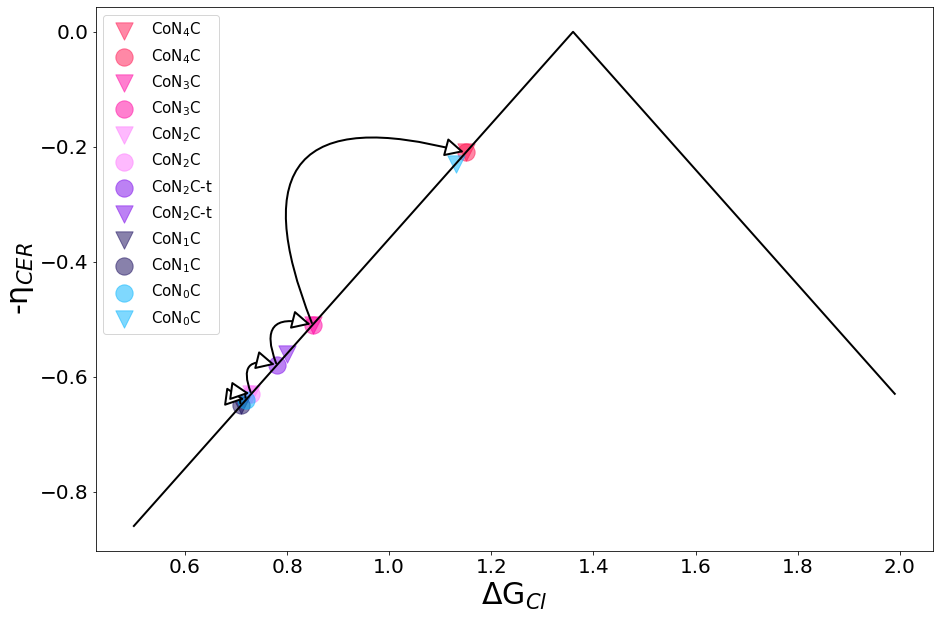

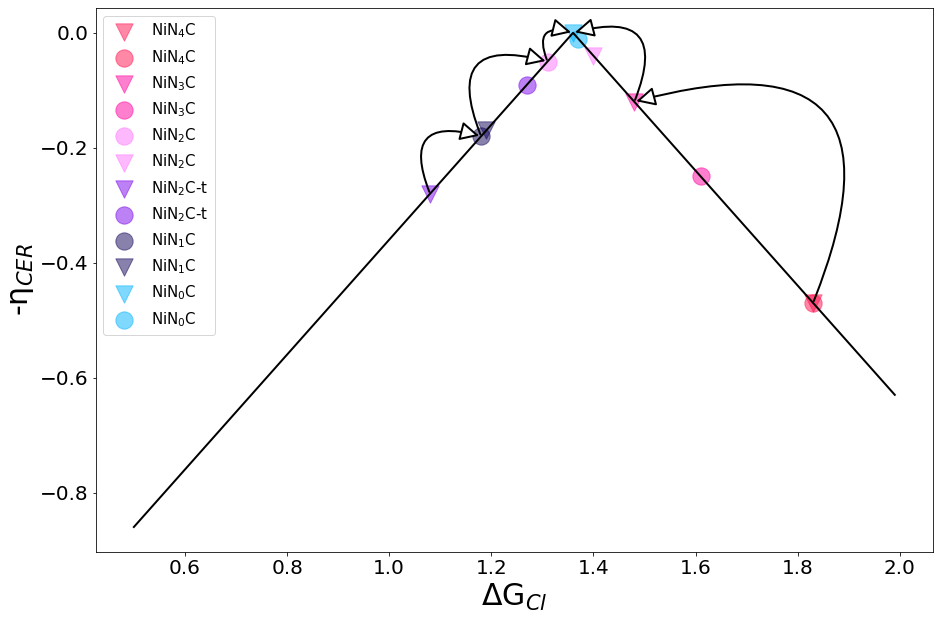

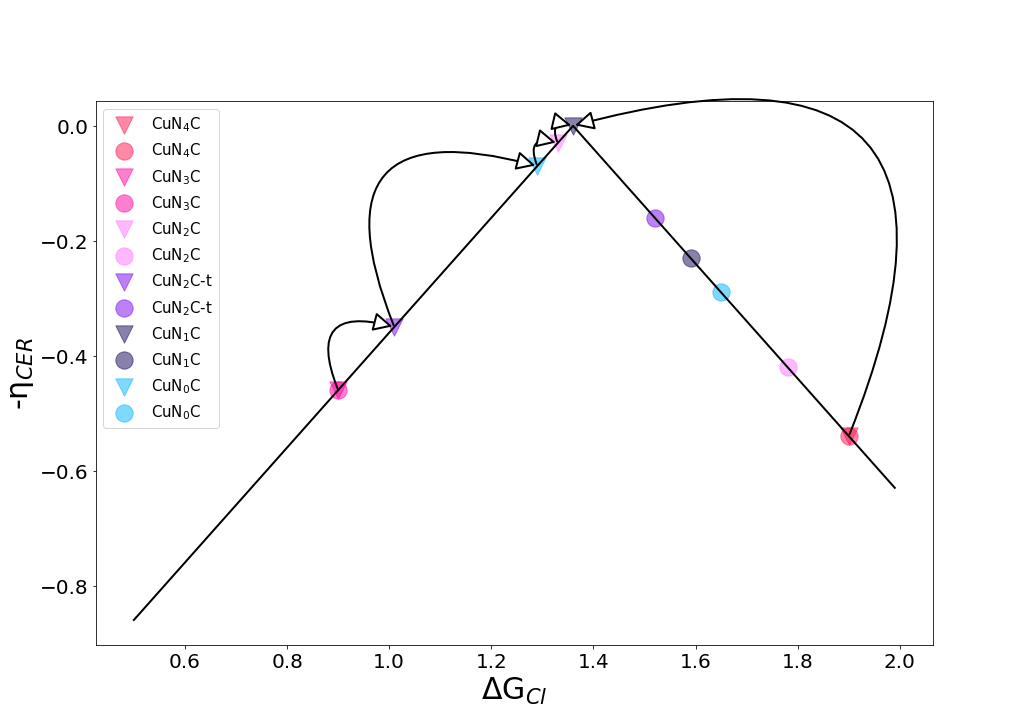

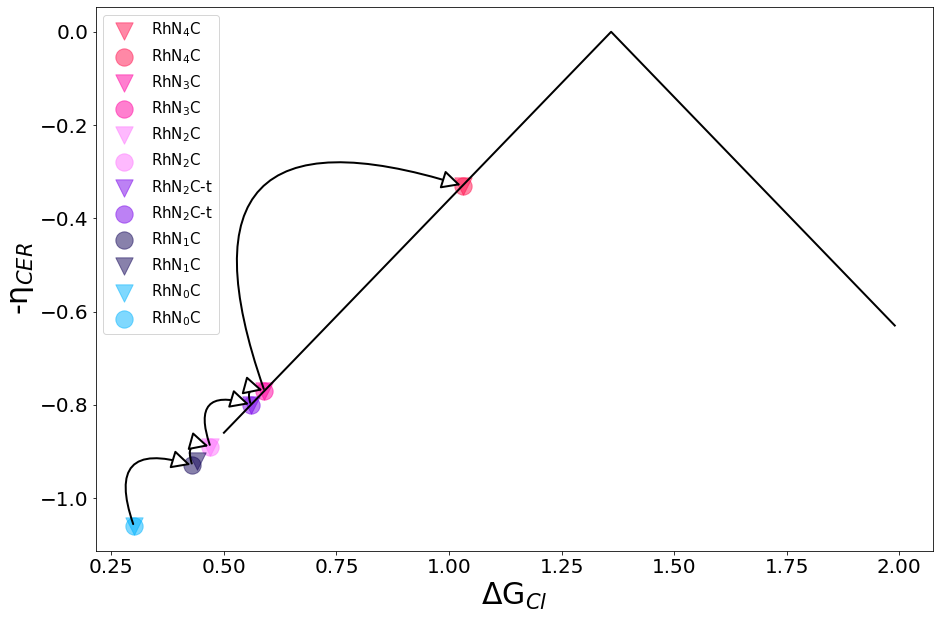

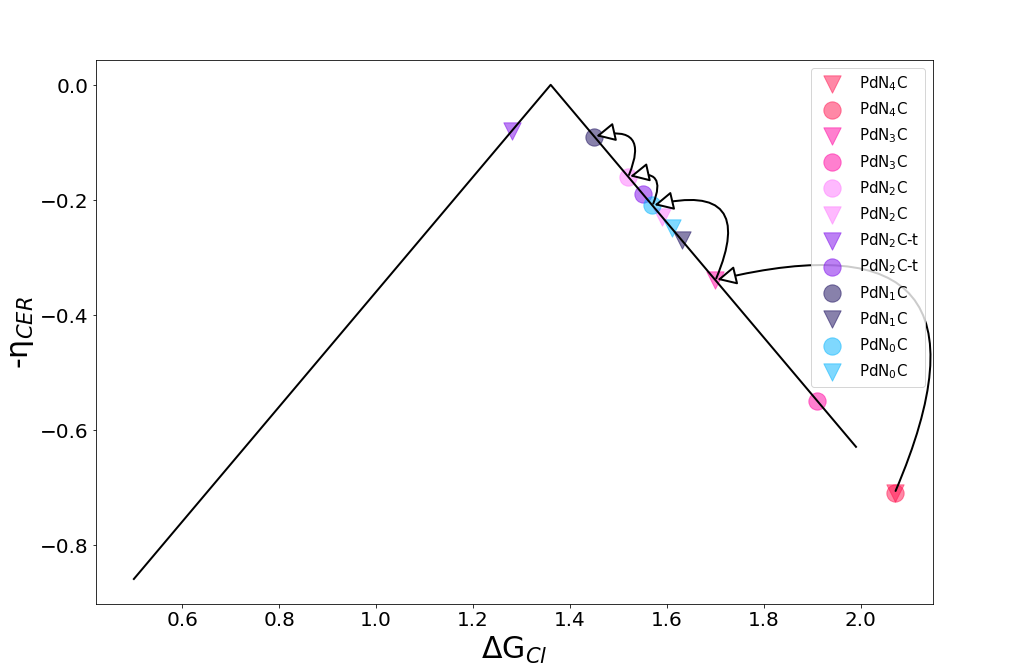

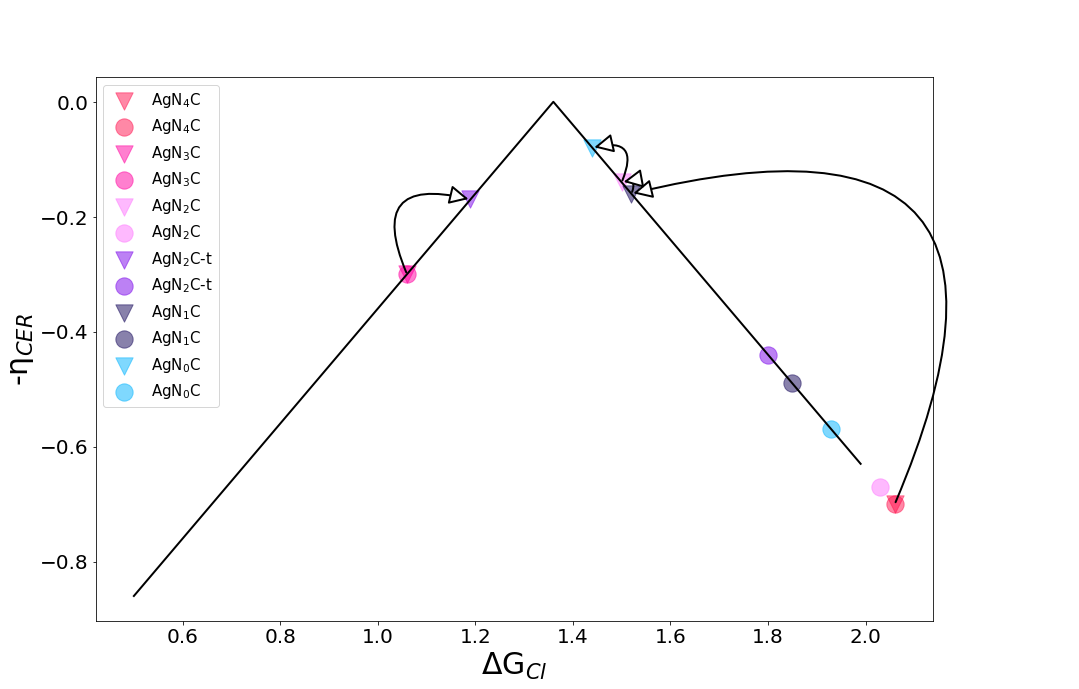

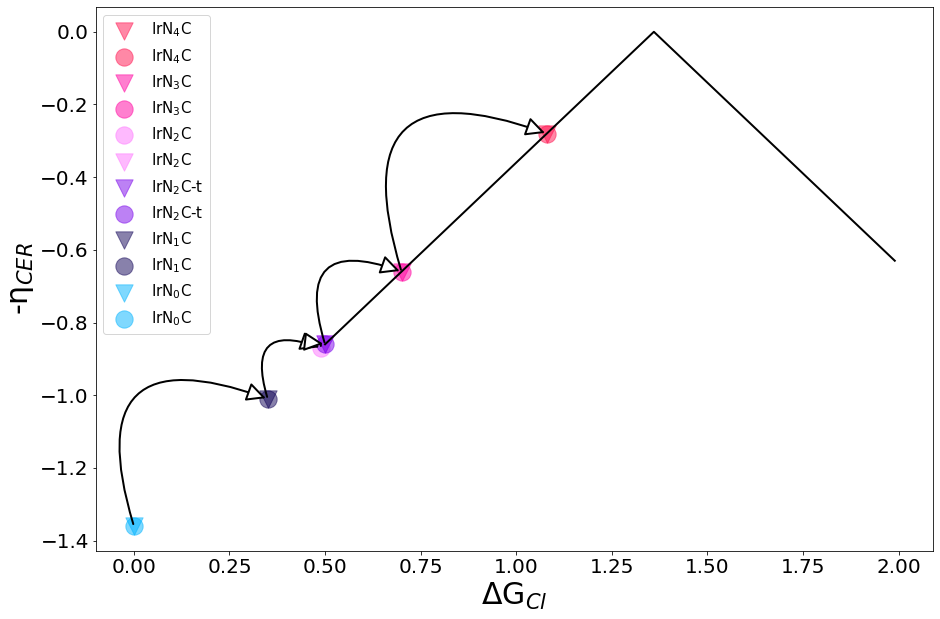

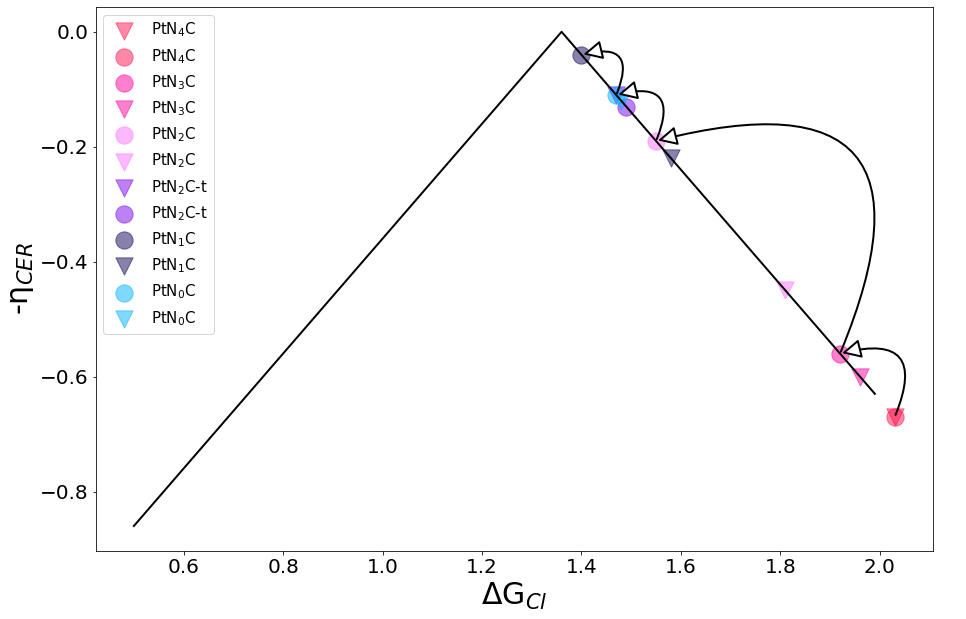

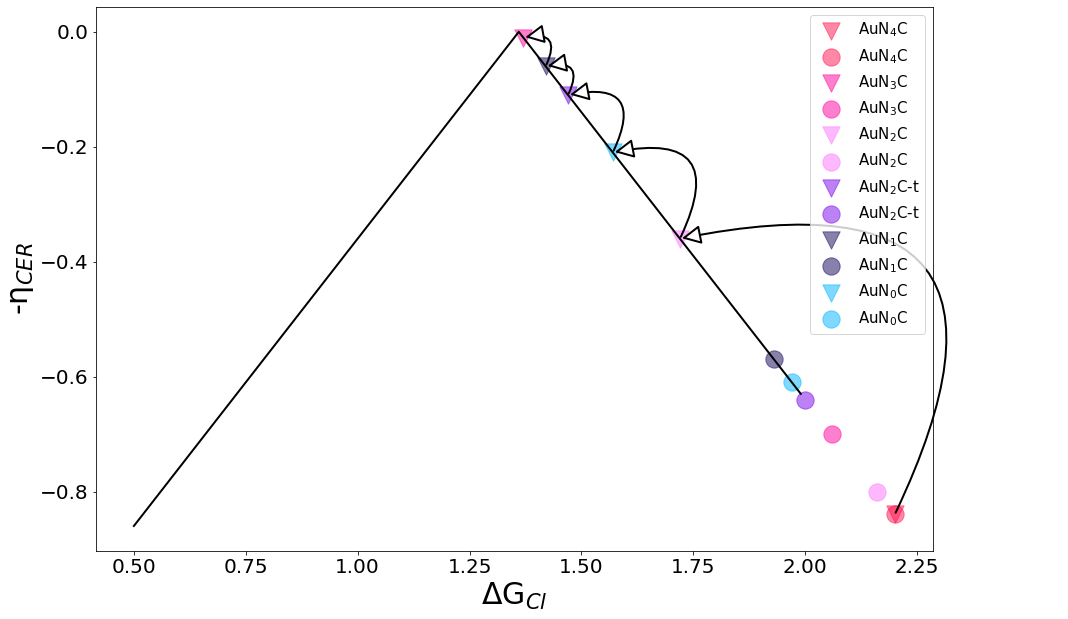

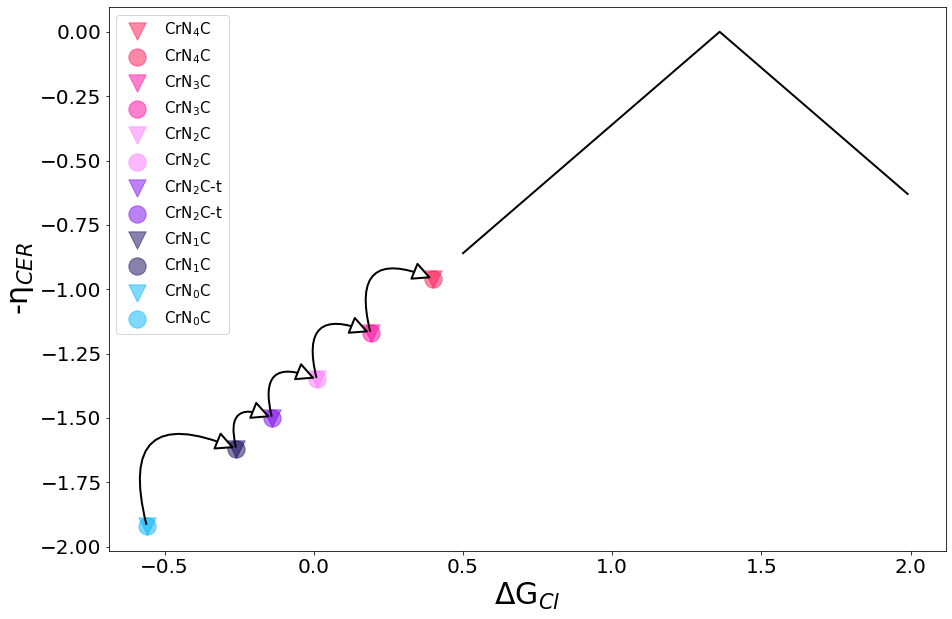

In [85]:
for i in TM_list :
  climbvolcano(i)

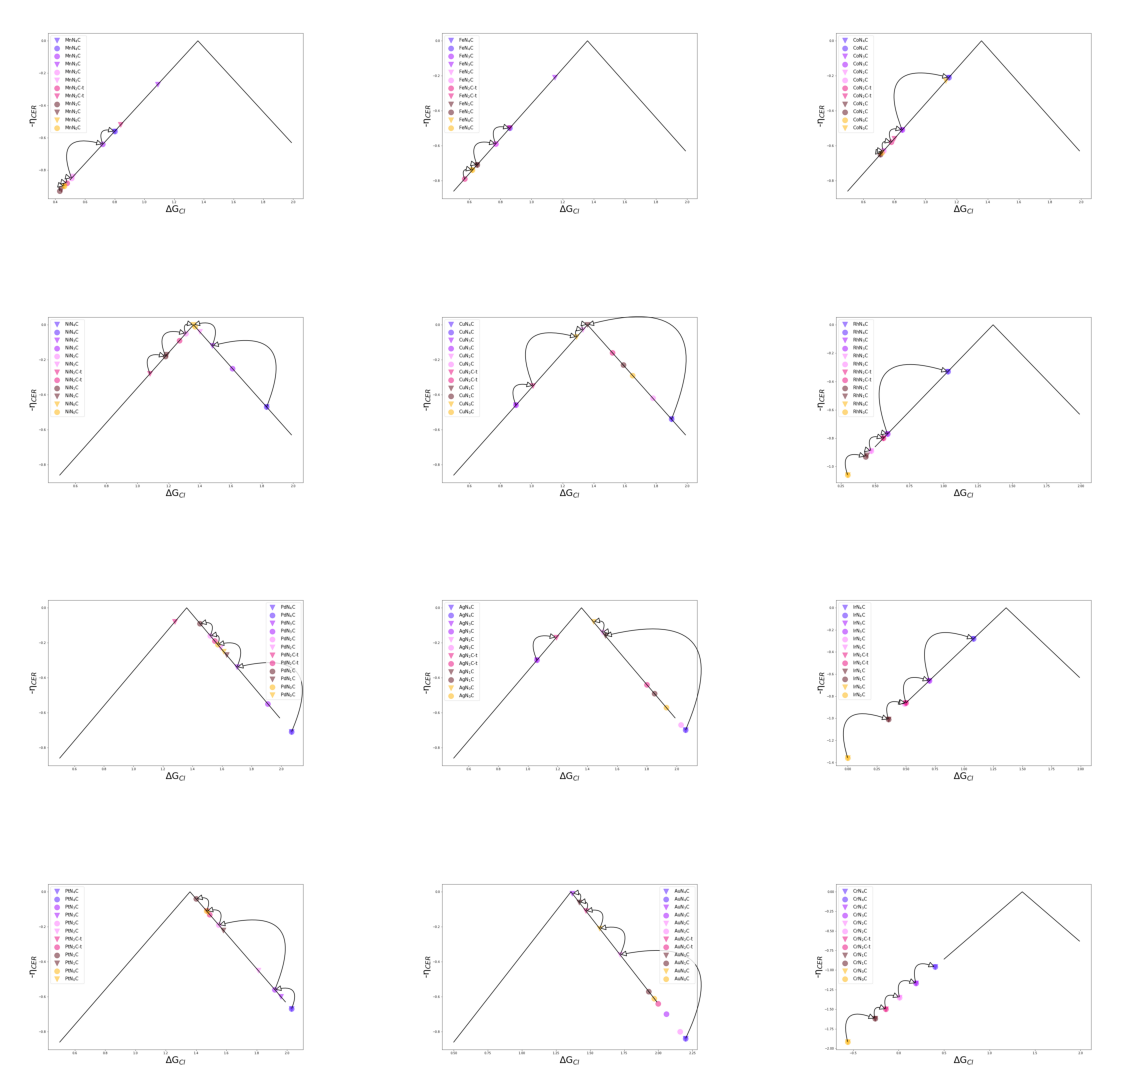

In [87]:
import cv2
from matplotlib import pyplot as plt

TM_list = list(p5_drop[0]['M'])
fig = plt.figure(figsize=(20, 20))
j=1
for i in TM_list :
    temp=  cv2.imread('/content/'+i+'3.png')
    fig.add_subplot(4, 3, j)
    plt.imshow(temp)
    plt.axis('off')
    j=j+1
plt.savefig('all2.png',dpi=300)#다운로드할때 쓰기

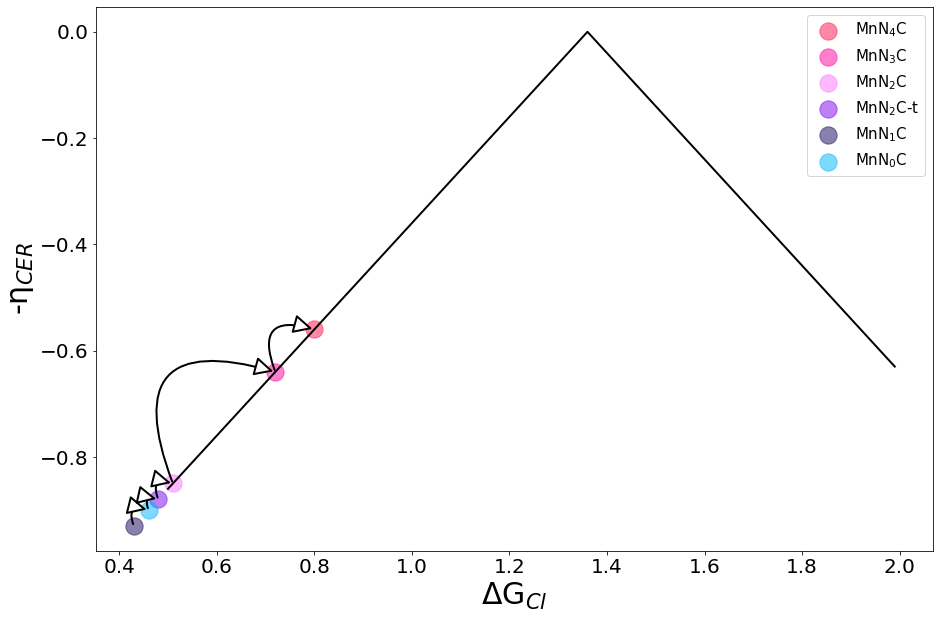

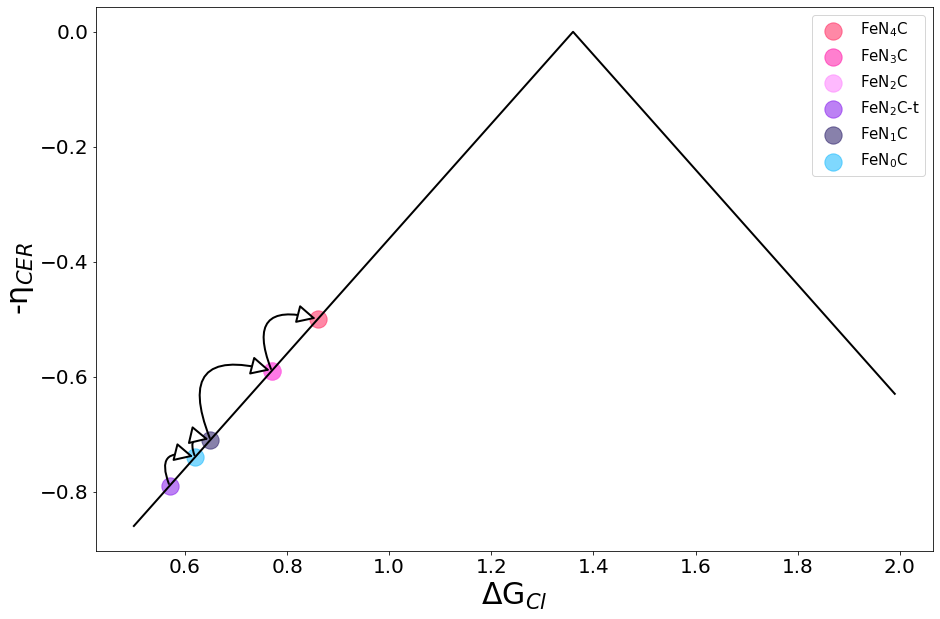

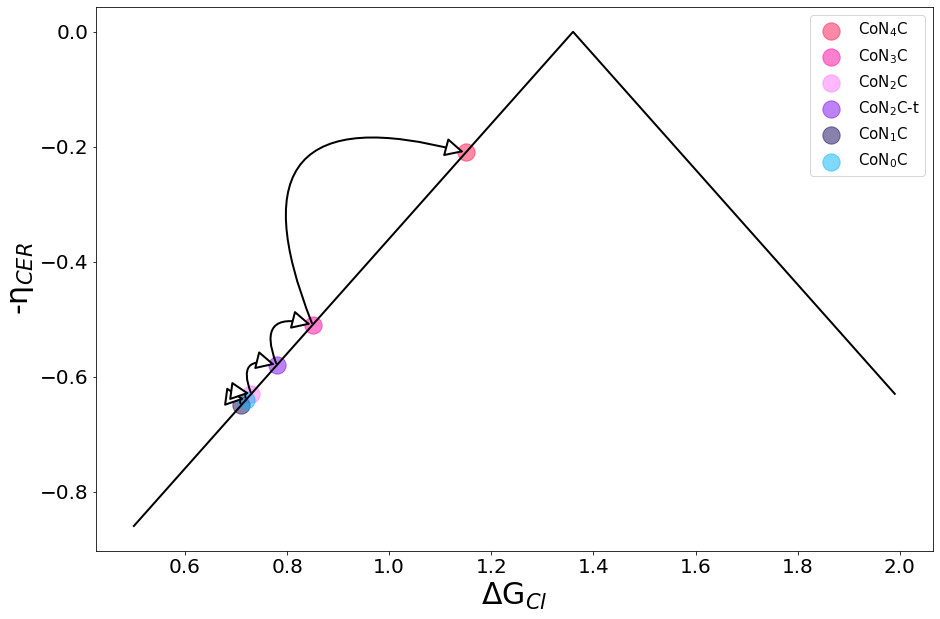

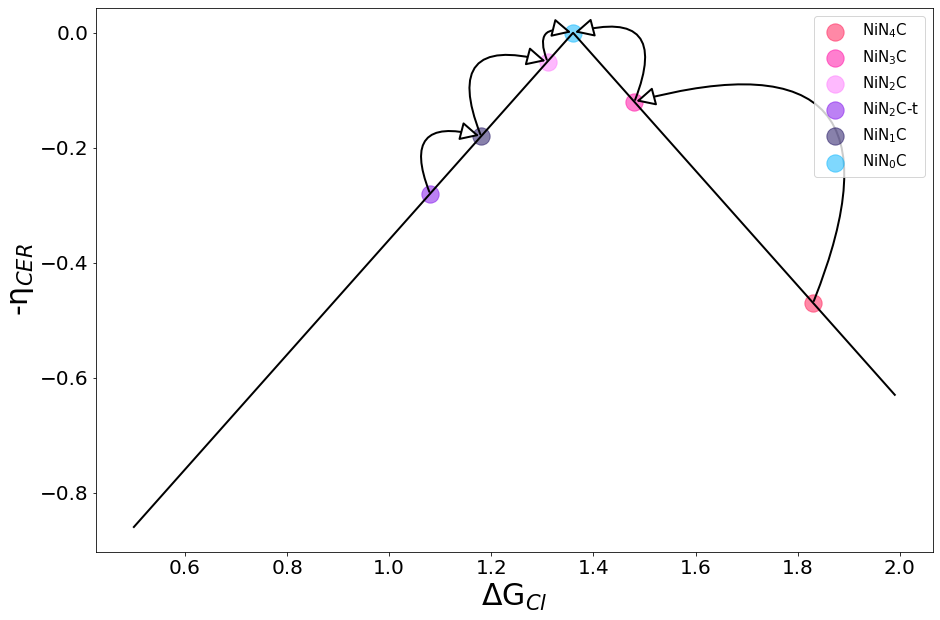

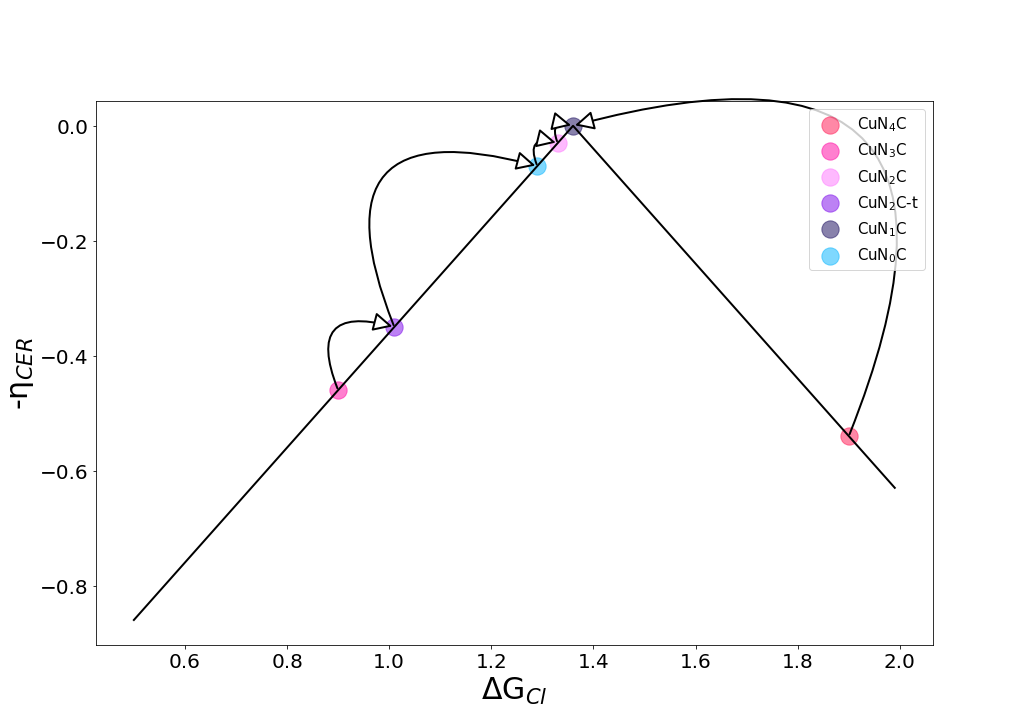

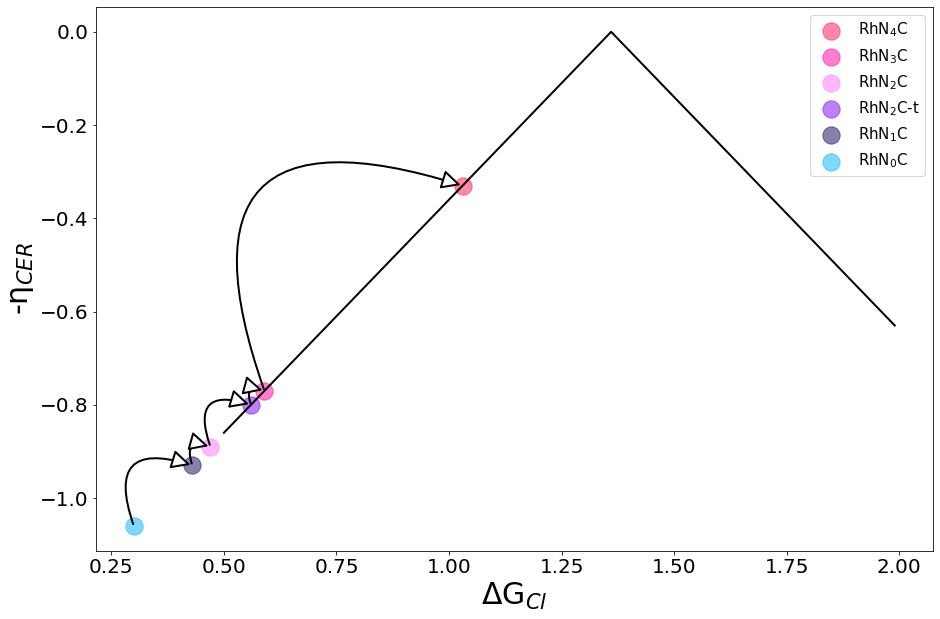

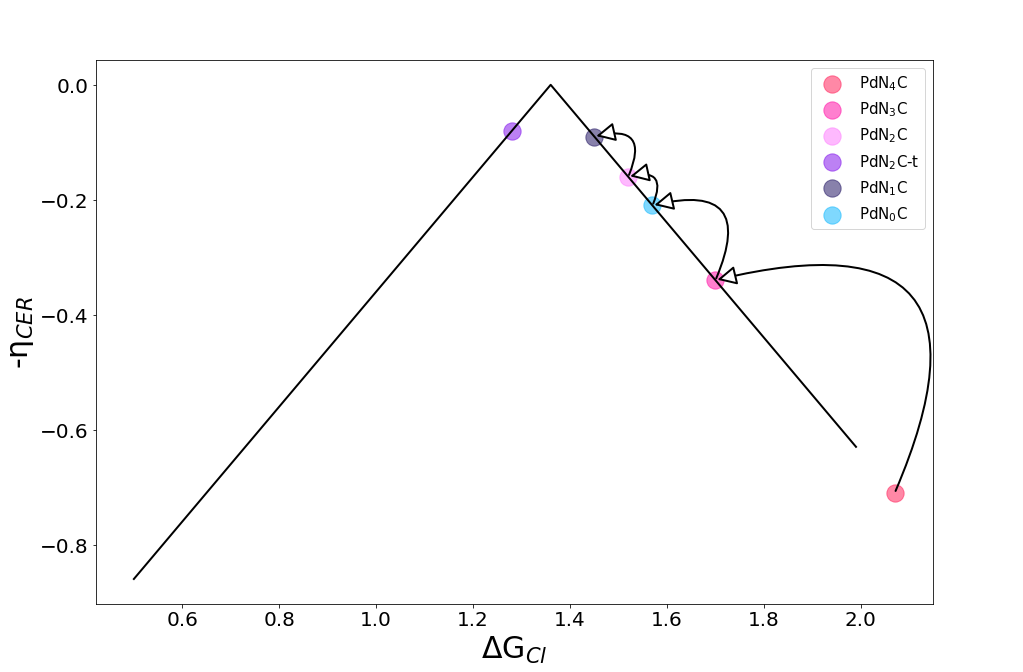

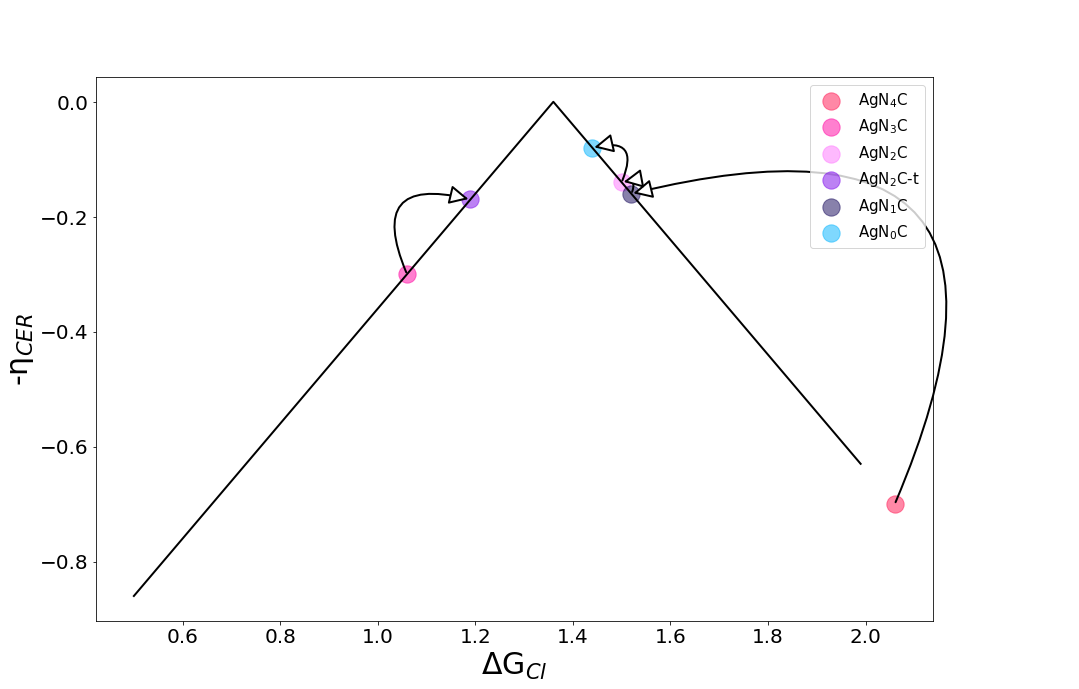

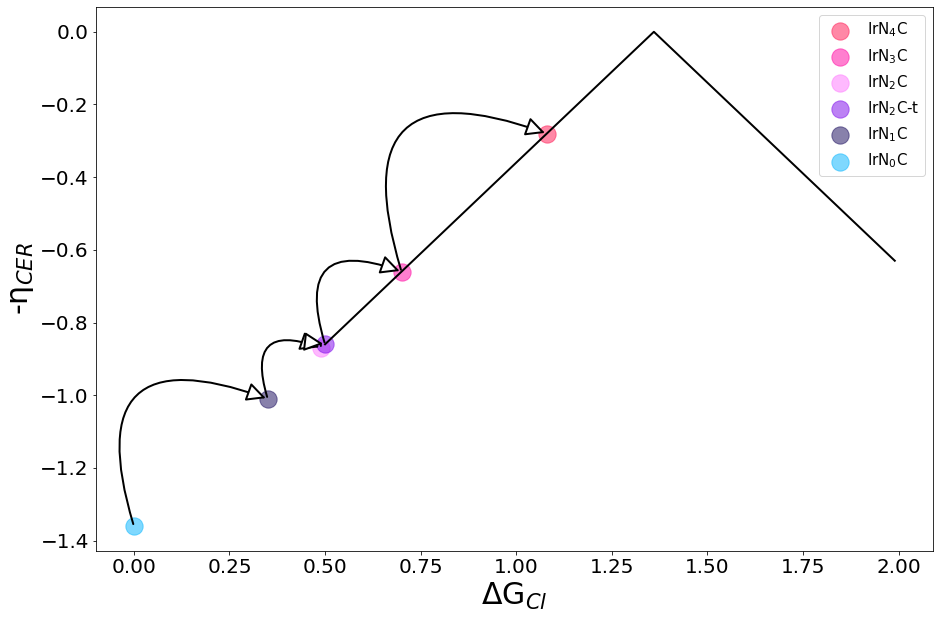

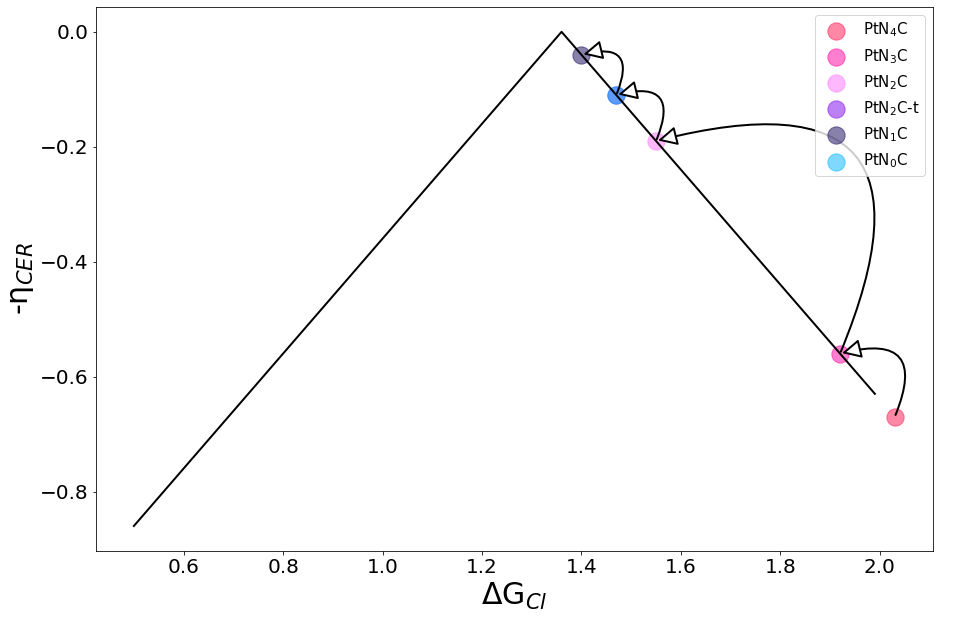

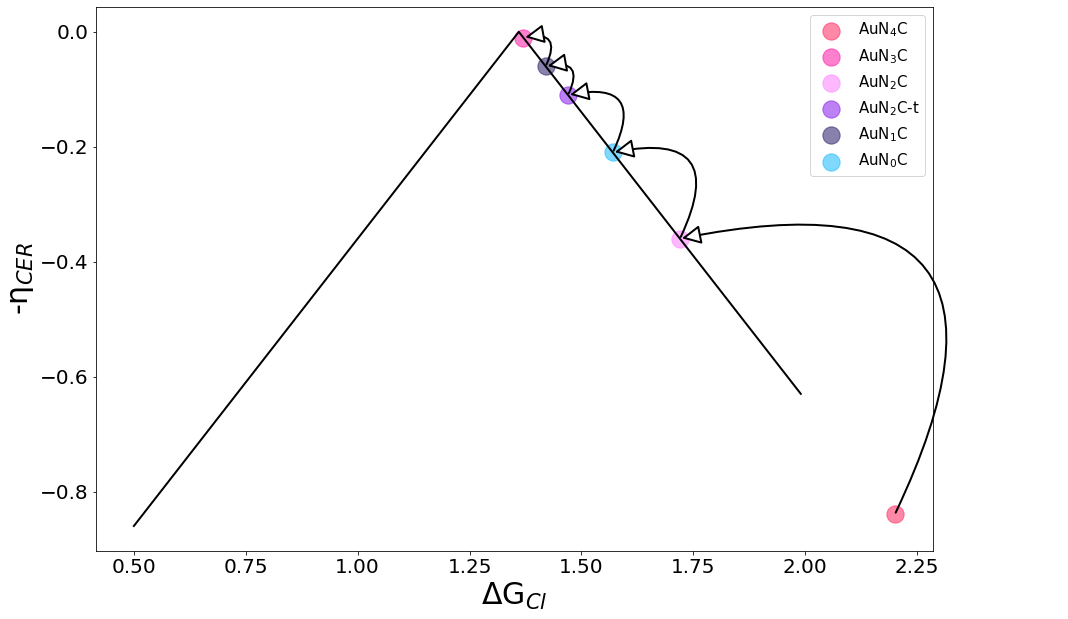

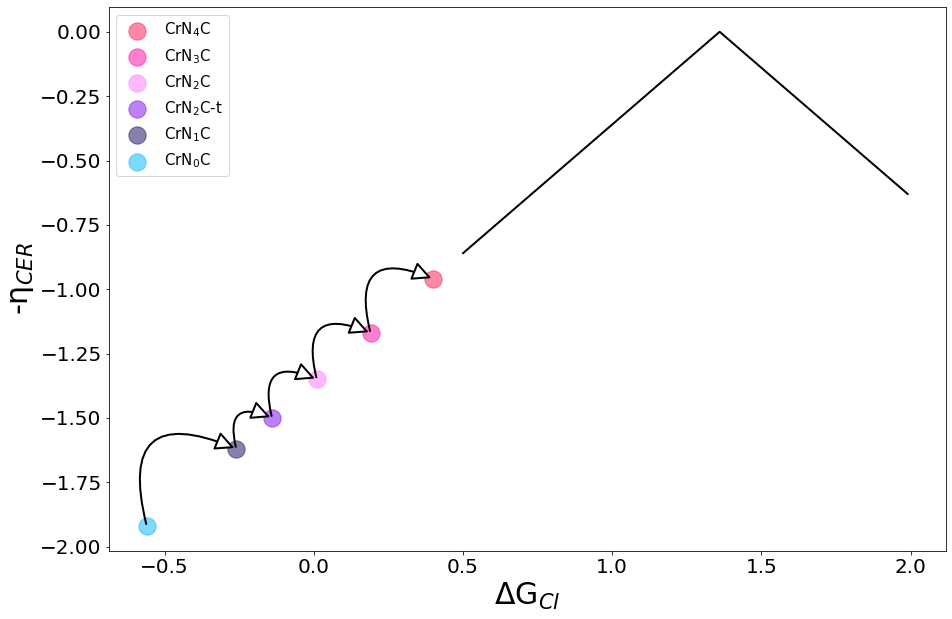

In [69]:
for i in TM_list :
  climbvolcano_annonimous(i)


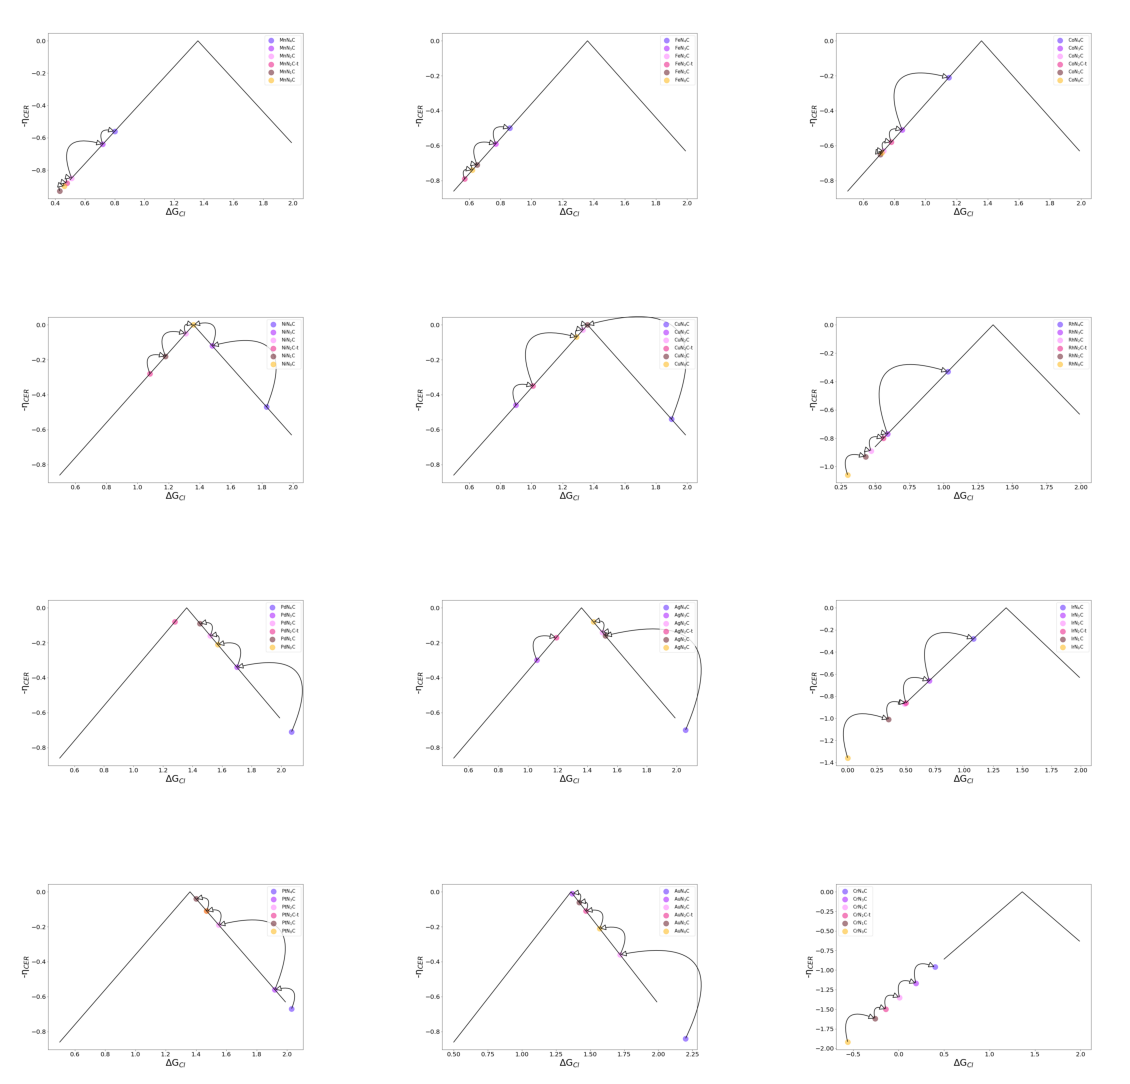

In [83]:
import cv2
from matplotlib import pyplot as plt

TM_list = list(p5_drop[0]['M'])
fig = plt.figure(figsize=(20, 20))
j=1
for i in TM_list :
    temp=  cv2.imread('/content/'+i+'2.png')
    fig.add_subplot(4, 3, j)
    plt.imshow(temp)
    plt.axis('off')
    j=j+1
plt.savefig('all.png')#다운로드할때 쓰기

In [71]:
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis


In [72]:
def NGplot(TM,cnum) :
    plt.figure(1,figsize=(15,10))
    
 #   c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE']
    c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE','#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE']

 #   c = Viridis
    Gcllist = list()
    Nlist = list()
    j = 0

    mark = '^'
    for i in p5 :
        temp = (i.loc[i['M']== TM, '#of N']).values[0]
        if temp == '2-t':
            type = 'trans'
            temp = '2'
            mark = 'o'
        N = int(temp)
        
        Gcl= (i.loc[i['M']== TM, 'G_Cl']).values[0]
        
        Gcllist.append(Gcl)
        Nlist.append(N)
        
        
        j = j+1
        mark = '^'
    
    Nlist2 = list(Nlist)
    Gcllist2 = list(Gcllist)
    del Nlist[3]
    del Gcllist[3]
    del Nlist2[2]
    del Gcllist2[2]
    
    Nlist2= Nlist2[1:4]
    Gcllist2 = Gcllist2[1:4]
    
    plt.scatter(Nlist,Gcllist,color=c[cnum],label = TM, marker=mark, s=300,alpha=0.5)
    plt.scatter(Nlist2[1],Gcllist2[1],color=c[cnum],label = TM+',trans', marker='o', s=300,alpha=0.5)
    
    plt.plot(Nlist,Gcllist,'--',color=c[cnum])
    plt.plot(Nlist2,Gcllist2,'--',color=c[cnum])
    
    listOf_Xticks = np.arange(0, 5, 1)
    plt.xticks(listOf_Xticks,fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=15)
    
    plt.xlabel('N',fontsize=30)
    plt.ylabel('ΔG$_{Cl}$ (eV)',fontsize=30)
        
    plt.axhline(y=1.36, color='black', linestyle='--',linewidth=2)
    plt.text(3.4,1.3,'optimal value',fontsize=20)
    plt.ylim([-0.1, 2.1])
    plt.savefig(str(TM)+'.png')#다운로드할때 쓰기
#    plt.show() #따로 뽑을때만 쓰기


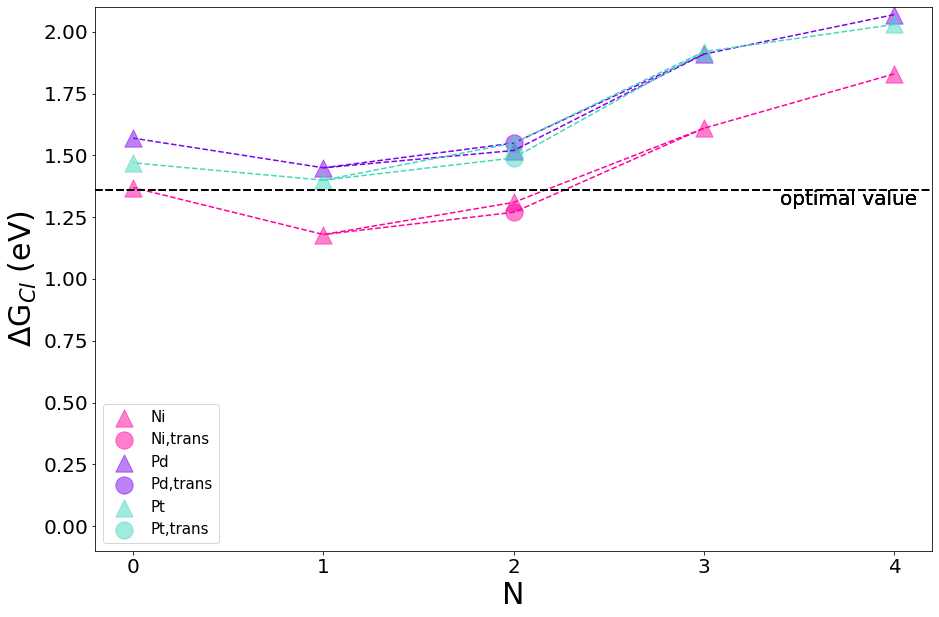

In [73]:
NGplot('Ni',1)
NGplot('Pd',3)
NGplot('Pt',6)

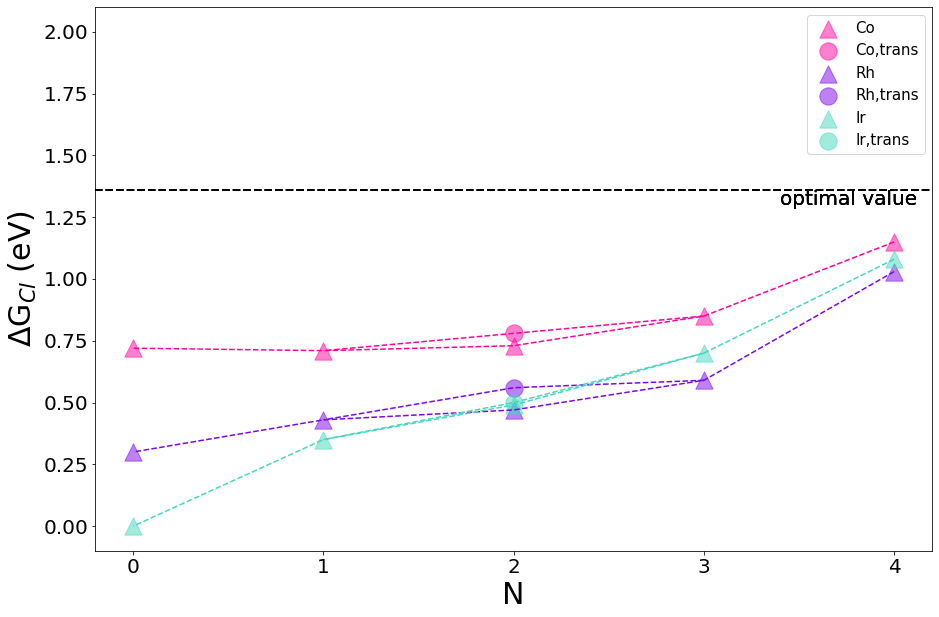

In [74]:
NGplot('Co',1)
NGplot('Rh',3)
NGplot('Ir',6)

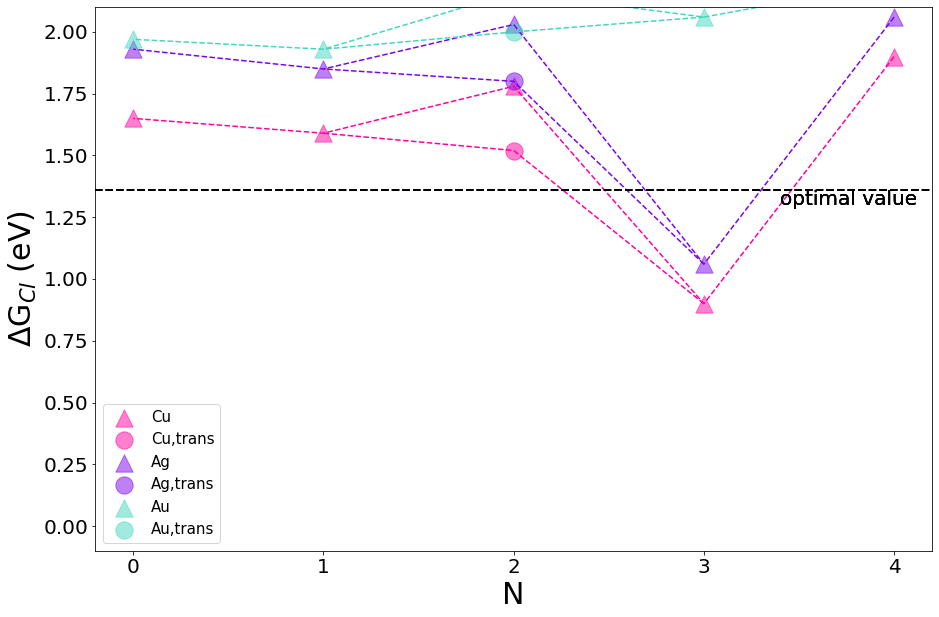

In [75]:
NGplot('Cu',1)
NGplot('Ag',3)
NGplot('Au',6)

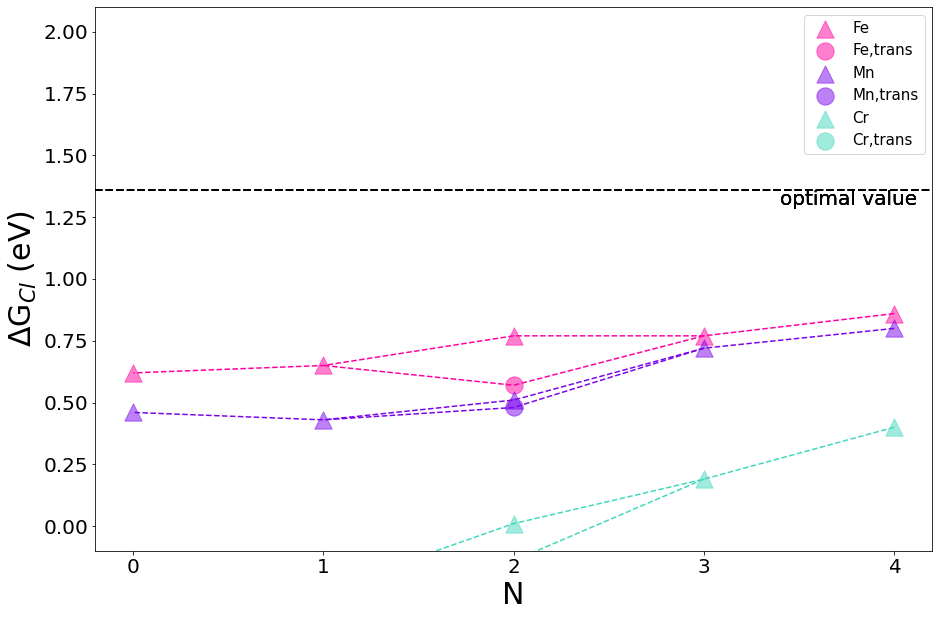

In [76]:
NGplot('Fe',1)
NGplot('Mn',3)
NGplot('Cr',6)

In [77]:
def NGplot2(TM,cnum) :
    plt.figure(1,figsize=(15,10))
    
    c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE','#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE']
    Gcllist = list()
    j = 0
    Nlist = [4,3,2,1,0]
    
    mark = '^'
    for i in p5_drop :
        temp = (i.loc[i['M']== TM, '#of N']).values[0]
        if temp == '2-t':
            type = 'trans'
            temp = '2'
            mark = 'o'
        
        Gcl= (i.loc[i['M']== TM, 'G_Cl']).values[0]
        
        Gcllist.append(Gcl)
                
        j = j+1
        mark = '^'
    
    
    if Gcllist[2] > Gcllist[3] :
        del Gcllist[2]
    else :
        del Gcllist[3]
            
    plt.scatter(Nlist,Gcllist,color=c[cnum],label = TM, marker=mark, s=300,alpha=0.5)
    plt.plot(Nlist,Gcllist,'--',color=c[cnum])
    
    listOf_Xticks = np.arange(0, 5, 1)
    plt.xticks(listOf_Xticks,fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=15)
    
    plt.xlabel('N',fontsize=30)
    plt.ylabel('ΔG$_{Cl}$ (eV)',fontsize=30)
        
    plt.axhline(y=1.36, color='black', linestyle='--',linewidth=2)
    plt.text(3.4,1.3,'optimal value',fontsize=20)
    

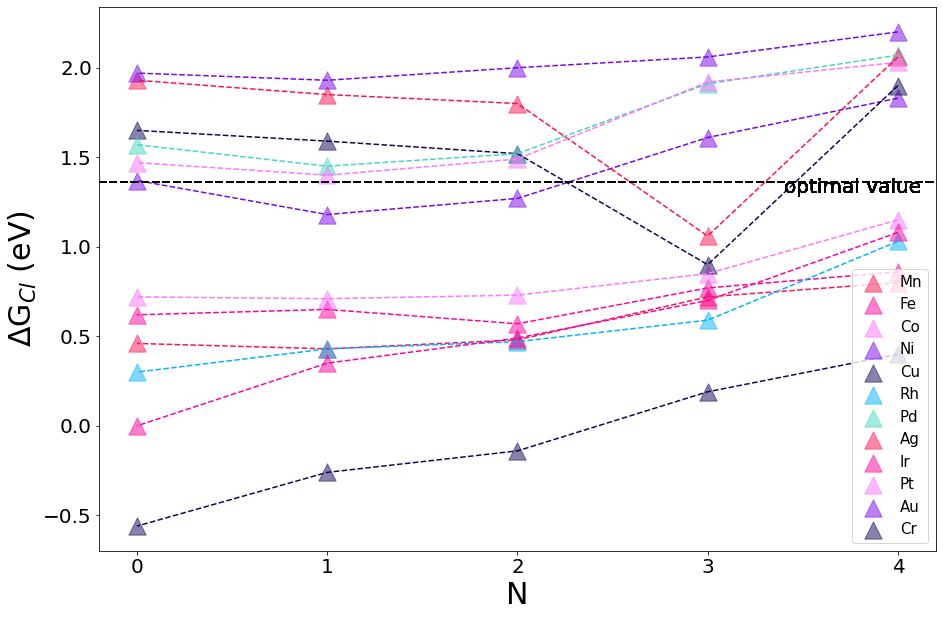

In [78]:
j=0
for i in TM_list :
    try:
      NGplot2(i,j)
    except IndexError:
     continue
    j=j+1


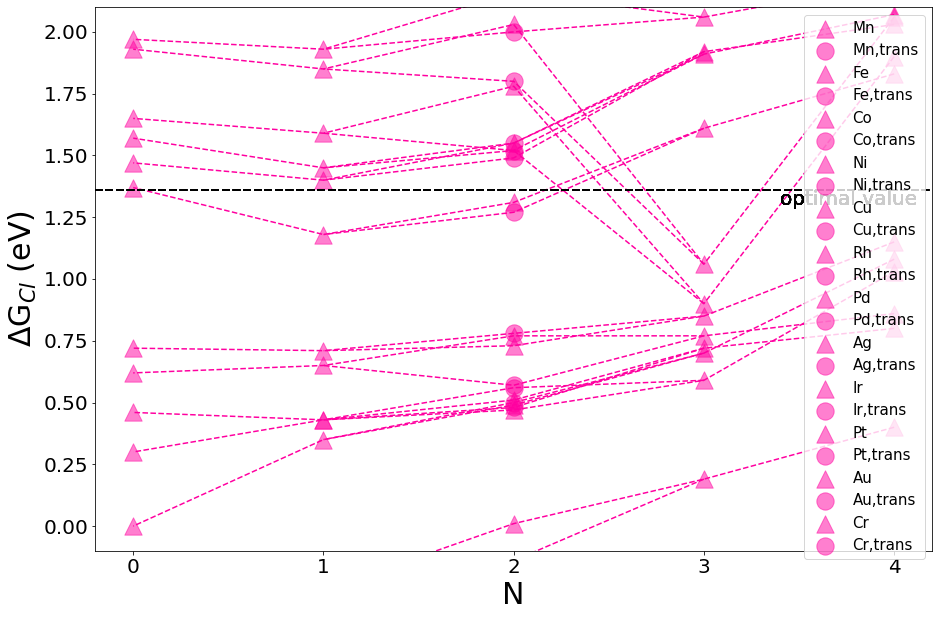

In [79]:
for i in TM_list :
    NGplot(i,1)